# Simultaneous Resistance/Reactance/Impedance
## Example H2 from the GUM

This example demonstrates three simultaneous functions and loading raw measurement data from a CSV file. All the input parameters, including mean, standard uncertainty, degrees of freedom, and correlations are determined from the data points in IVdata.csv file.

The measured values are all arrays, so Type A uncertainty is calculated automatically by supplying the array to the `measure()` method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import suncal

In [2]:
# Load the data from Table H.2 in GUM.
V, J, th = np.genfromtxt('IVdata.csv', delimiter=',', skip_header=1).T

In [3]:
# Three functions to calculate
R = 'R = V/J * cos(theta)'
X = 'X = V/J * sin(theta)'
Z = 'Z = V/J'
u = suncal.Model(R, X, Z)
u.var('V').measure(V, units='volt')
u.var('J').measure(J, units='mA')
u.var('theta').measure(th, units='rad')

# Use numpy to determine correlation coefficients
u.variables.set_correlation(np.corrcoef(np.vstack((V, J, th))), names=['V', 'J', 'theta'])

In [4]:
result = u.calculate().units(R='ohm', X='ohm', Z='ohm')
result.report.summary(n=3)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$R$   | GUM          | 127.7322 Ω  | 0.0711 Ω           | ± 0.903 Ω     | 12.706    | 0.1           |
|$R$   | Monte Carlo  | 127.7320 Ω  | 0.0710 Ω           | (127.5926 Ω, 127.8712 Ω) | 1.960     | -             |
|$X$   | GUM          | 219.847 Ω  | 0.296 Ω           | ± 0.594 Ω     | 2.008     | 50.2          |
|$X$   | Monte Carlo  | 219.846 Ω | 0.296 Ω          | (219.266 Ω, 220.425 Ω) | 1.961     | -             |
|$Z$   | GUM          | 254.260 Ω | 0.236 Ω          | ± 0.509 Ω    | 2.155     | 13.3          |
|$Z$   | Monte Carlo  | 254.259 Ω | 0.236 Ω          | (253.796 Ω, 254.722 Ω) | 1.960     | -             |

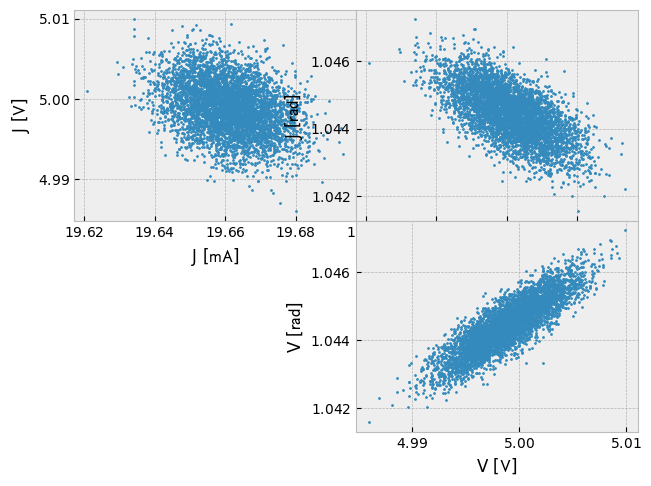

In [5]:
# Scatter plot will show the correlations between variables. Reducing number of points in scatter plot to speed up drawing.
result.report.montecarlo.plot.variable_scatter(points=5000);

In [6]:
result.report.expanded()

### GUM Approximation


|Function   | Level of Confidence   | Minimum   | Maximum   | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|---------------------|---------|---------|---------|--------------|----------------------|
|$R$   | 95.00%                | 130 Ω  | 130 Ω  | 12.706    | 0.13           | 0.90 Ω              |
|$X$   | 95.00%                | 220 Ω  | 220 Ω  | 2.008     | 50.24          | 0.59 Ω              |
|$Z$   | 95.00%                | 250 Ω  | 250 Ω  | 2.155     | 13.35          | 0.51 Ω              |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Level of Confidence   | Minimum   | Maximum   | Coverage Factor  |
|----------|---------------------|---------|---------|-----------------|
|$R$   | 95.00%                | 130 Ω  | 130 Ω  | 1.960            |
|$X$   | 95.00%                | 220 Ω  | 220 Ω  | 1.961            |
|$Z$   | 95.00%                | 250 Ω  | 250 Ω  | 1.960            |

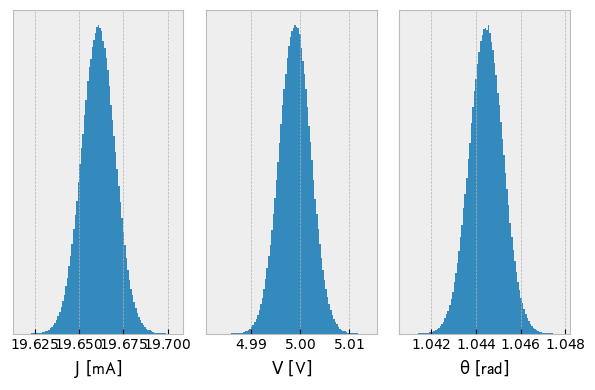

In [7]:
f = plt.figure(figsize=(6,4))
result.report.montecarlo.plot.variable_hist(fig=f)

In [8]:
result.report.gum.derivation()

### Measurement Model:

$R = \frac{V \cos{\left(\theta \right)}}{J}$

$X = \frac{V \sin{\left(\theta \right)}}{J}$

$Z = \frac{V}{J}$

### Input Covariance Matrix [Ux]:


|-         | J         | V         | theta    |
|---------|---------|---------|---------|
|J         | $u_{J}^{2}$  | $\sigma_{JV} u_{J} u_{V}$  | $\sigma_{Jtheta} u_{J} u_{\theta}$ |
|V         | $\sigma_{JV} u_{J} u_{V}$  | $u_{V}^{2}$  | $\sigma_{Vtheta} u_{V} u_{\theta}$ |
|theta     | $\sigma_{Jtheta} u_{J} u_{\theta}$  | $\sigma_{Vtheta} u_{V} u_{\theta}$  | $u_{\theta}^{2}$ |


### Sensitivity Matrix [Cx]:

##### Partial Derivatives:


|-         | J         | V         | theta    |
|---------|---------|---------|---------|
|$R$  | $\frac{\partial}{\partial J} R$  | $\frac{\partial}{\partial V} R$  | $\frac{\partial}{\partial \theta} R$ |
|$X$  | $\frac{\partial}{\partial J} X$  | $\frac{\partial}{\partial V} X$  | $\frac{\partial}{\partial \theta} X$ |
|$Z$  | $\frac{\partial}{\partial J} Z$  | $\frac{\partial}{\partial V} Z$ | $\frac{\partial}{\partial \theta} Z$|


##### Computed Partial Derivatives:


|-         | J         | V         | theta    |
|---------|---------|---------|---------|
|$R$  | $- \frac{V \cos{\left(\theta \right)}}{J^{2}}$  | $\frac{\cos{\left(\theta \right)}}{J}$  | $- \frac{V \sin{\left(\theta \right)}}{J}$ |
|$X$  | $- \frac{V \sin{\left(\theta \right)}}{J^{2}}$  | $\frac{\sin{\left(\theta \right)}}{J}$  | $\frac{V \cos{\left(\theta \right)}}{J}$ |
|$Z$  | $- \frac{V}{J^{2}}$  | $\frac{1}{J}$ | $0$|


### Combined Covariance [Uy]:

$U_y = C_x \cdot U_x \cdot C_x^T$

#### Uncertainties $\left(\sqrt{\mathrm{diag}(U_y)}\right)$:

$u_{R} = \sqrt{- \frac{V \left(- \frac{V u_{\theta}^{2} \sin{\left(\theta \right)}}{J} + \frac{\sigma_{Vtheta} u_{V} u_{\theta} \cos{\left(\theta \right)}}{J} - \frac{V \sigma_{Jtheta} u_{J} u_{\theta} \cos{\left(\theta \right)}}{J^{2}}\right) \sin{\left(\theta \right)}}{J} + \frac{\left(- \frac{V \sigma_{Vtheta} u_{V} u_{\theta} \sin{\left(\theta \right)}}{J} + \frac{u_{V}^{2} \cos{\left(\theta \right)}}{J} - \frac{V \sigma_{JV} u_{J} u_{V} \cos{\left(\theta \right)}}{J^{2}}\right) \cos{\left(\theta \right)}}{J} - \frac{V \left(- \frac{V \sigma_{Jtheta} u_{J} u_{\theta} \sin{\left(\theta \right)}}{J} + \frac{\sigma_{JV} u_{J} u_{V} \cos{\left(\theta \right)}}{J} - \frac{V u_{J}^{2} \cos{\left(\theta \right)}}{J^{2}}\right) \cos{\left(\theta \right)}}{J^{2}}}$

$u_{X} = \sqrt{\frac{V \left(\frac{V u_{\theta}^{2} \cos{\left(\theta \right)}}{J} + \frac{\sigma_{Vtheta} u_{V} u_{\theta} \sin{\left(\theta \right)}}{J} - \frac{V \sigma_{Jtheta} u_{J} u_{\theta} \sin{\left(\theta \right)}}{J^{2}}\right) \cos{\left(\theta \right)}}{J} + \frac{\left(\frac{V \sigma_{Vtheta} u_{V} u_{\theta} \cos{\left(\theta \right)}}{J} + \frac{u_{V}^{2} \sin{\left(\theta \right)}}{J} - \frac{V \sigma_{JV} u_{J} u_{V} \sin{\left(\theta \right)}}{J^{2}}\right) \sin{\left(\theta \right)}}{J} - \frac{V \left(\frac{V \sigma_{Jtheta} u_{J} u_{\theta} \cos{\left(\theta \right)}}{J} + \frac{\sigma_{JV} u_{J} u_{V} \sin{\left(\theta \right)}}{J} - \frac{V u_{J}^{2} \sin{\left(\theta \right)}}{J^{2}}\right) \sin{\left(\theta \right)}}{J^{2}}}$

$u_{Z} = \sqrt{\frac{\frac{u_{V}^{2}}{J} - \frac{V \sigma_{JV} u_{J} u_{V}}{J^{2}}}{J} - \frac{V \left(\frac{\sigma_{JV} u_{J} u_{V}}{J} - \frac{V u_{J}^{2}}{J^{2}}\right)}{J^{2}}}$

### Effective degrees of freedom:

$\nu_{R} = \frac{u_{R}^{4}}{\frac{V^{4} u_{\theta}^{4} \sin^{4}{\left(\theta \right)}}{J^{4} \nu_{\theta}} + \frac{u_{V}^{4} \cos^{4}{\left(\theta \right)}}{J^{4} \nu_{V}} + \frac{V^{4} u_{J}^{4} \cos^{4}{\left(\theta \right)}}{J^{8} \nu_{J}}}$

$\nu_{X} = \frac{u_{X}^{4}}{\frac{V^{4} u_{\theta}^{4} \cos^{4}{\left(\theta \right)}}{J^{4} \nu_{\theta}} + \frac{u_{V}^{4} \sin^{4}{\left(\theta \right)}}{J^{4} \nu_{V}} + \frac{V^{4} u_{J}^{4} \sin^{4}{\left(\theta \right)}}{J^{8} \nu_{J}}}$

$\nu_{Z} = \frac{u_{Z}^{4}}{\frac{u_{V}^{4}}{J^{4} \nu_{V}} + \frac{V^{4} u_{J}^{4}}{J^{8} \nu_{J}}}$